Original Data Head:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  Stock

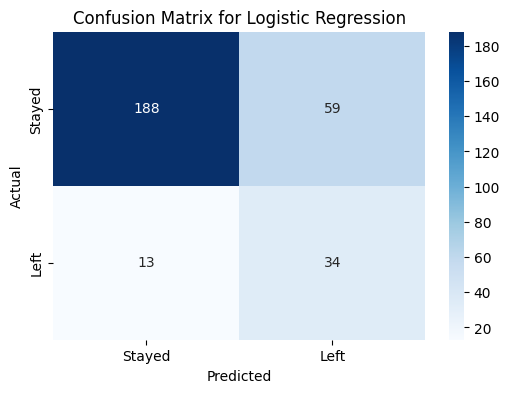


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       247
           1       0.37      0.72      0.49        47

    accuracy                           0.76       294
   macro avg       0.65      0.74      0.66       294
weighted avg       0.84      0.76      0.78       294


--- Training Decision Tree Model ---

--- Starting GridSearchCV for DecisionTree ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV for DecisionTree finished.
Best parameters for DecisionTree: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Best cross-validation recall score for DecisionTree: 0.5526

--- Decision Tree Evaluation Metrics ---
Accuracy: 0.7619
Precision: 0.3425
Recall: 0.5319
F1-Score: 0.4167
AUC-ROC: 0.6532

Confusion Matrix:
[[199  48]
 [ 22  25]]


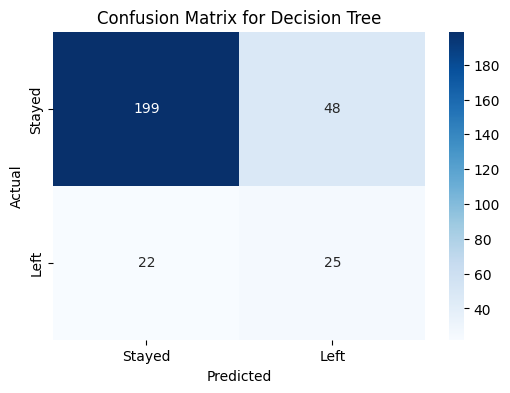


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       247
           1       0.34      0.53      0.42        47

    accuracy                           0.76       294
   macro avg       0.62      0.67      0.63       294
weighted avg       0.81      0.76      0.78       294


--- Training Random Forest Model ---

--- Starting GridSearchCV for RandomForest ---
Fitting 5 folds for each of 144 candidates, totalling 720 fits
GridSearchCV for RandomForest finished.
Best parameters for RandomForest: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation recall score for RandomForest: 0.4947

--- Random Forest Evaluation Metrics ---
Accuracy: 0.8197
Precision: 0.4464
Recall: 0.5319
F1-Score: 0.4854
AUC-ROC: 0.7912

Confusion Matrix:
[[216  31]
 [ 22  25]]


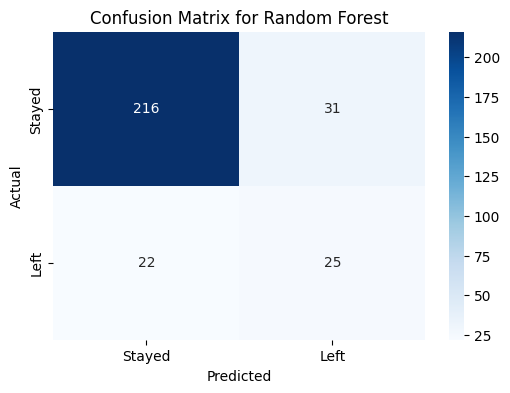


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.45      0.53      0.49        47

    accuracy                           0.82       294
   macro avg       0.68      0.70      0.69       294
weighted avg       0.83      0.82      0.83       294


--- Gradient Boosting Model ---

--- Starting GridSearchCV for GradientBoosting ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
GridSearchCV for GradientBoosting finished.
Best parameters for GradientBoosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best cross-validation recall score for GradientBoosting: 0.4105

--- Gradient Boosting Evaluation Metrics ---
Accuracy: 0.8469
Precision: 0.5500
Recall: 0.2340
F1-Score: 0.3284
AUC-ROC: 0.8008

Confusion Matrix:
[[238   9]
 [ 36  11]]


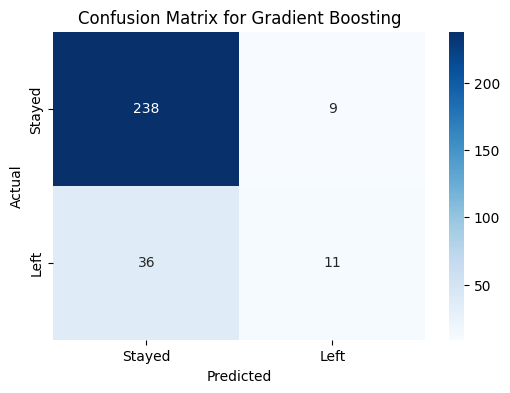


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294


--- Starting Training for K-Nearest Neighbors ---

--- Starting GridSearchCV for KNeighbors ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV for KNeighbors finished.
Best parameters for KNeighbors: {'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'uniform'}
Best cross-validation recall score for KNeighbors: 0.2053

--- K-Nearest Neighbors Evaluation Metrics ---
Accuracy: 0.8299
Precision: 0.4286
Recall: 0.1915
F1-Score: 0.2647
AUC-ROC: 0.6143

Confusion Matrix:
[[235  12]
 [ 38   9]]


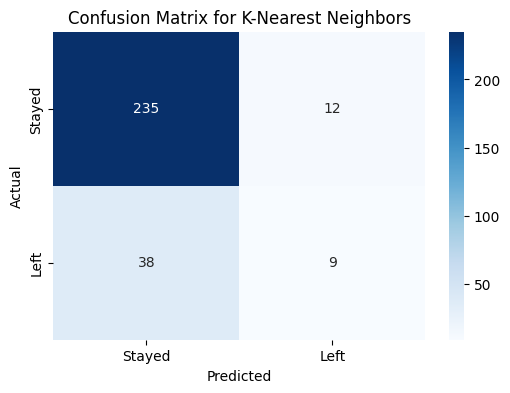


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       247
           1       0.43      0.19      0.26        47

    accuracy                           0.83       294
   macro avg       0.64      0.57      0.58       294
weighted avg       0.79      0.83      0.80       294

Model saved to c:/users/91904/trained_model.pkl
Model loaded from c:/users/91904/trained_model.pkl

--- Making Predictions on Sample New Data ---
      Age                    JobRole  MonthlyIncome  \
1383   36      Laboratory Technician           2810   
557    35  Healthcare Representative           5093   
1147   49      Laboratory Technician           3211   
1145   36     Manufacturing Director           4663   
1366   39            Sales Executive           5736   
...   ...                        ...            ...   
347    47       Sales Representative           2976   
1447   36            Sales Executive           5406   
1232   3

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    """Loads the employee attrition dataset."""
    df = pd.read_csv(r'C:\Users\91904\Downloads\Employee-Attrition - Employee-Attrition.csv')
    return df

def clean_data(df):
    
    dfnew = df.copy()
    columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
    
    dfnew = dfnew.drop(columns=columns_to_drop, errors='ignore')
    return dfnew

def preprocess_data(df, target_column='Attrition', test_size=0.2, random_state=42):
   
    df_processed = df

   
    le = LabelEncoder()
    df_processed[target_column] = le.fit_transform(df_processed[target_column]) 
   
    X = df_processed.drop(columns=[target_column])
    y = df_processed[target_column]
   
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    numerical_features = [col for col in numerical_features if col != target_column]

    categorical_features = X.select_dtypes(include=['object']).columns

  
    numerical_transformer = StandardScaler() # Scale numerical features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore') # One-hot encode categorical features

    # Create a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' 
    )

 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    return X_train, X_test, y_train, y_test, preprocessor, numerical_features, categorical_features

def train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='RandomForest'):
   
    model = None
    param_grid = {}

    if model_type == 'LogisticRegression':
        model = LogisticRegression(random_state=42, max_iter=1000)
        param_grid = {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs'],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'DecisionTree':
        model = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'classifier__max_depth': [5, 8, 10, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'GradientBoosting':
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 8],
            'classifier__subsample': [0.8, 1.0]
        }
    elif model_type == 'KNeighbors': # NEW: KNeighborsClassifier
        model = KNeighborsClassifier()
        param_grid = {
            'classifier__n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors
            'classifier__weights': ['uniform', 'distance'], # Weighting function used in prediction
            'classifier__p': [1, 2] # Power parameter for the Minkowski metric. 1 for Manhattan, 2 for Euclidean
        }   
   
    else:
        raise ValueError(f"Invalid model_type: {model_type}. Choose from 'LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'SVC'.")

    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    print(f"\n--- Starting GridSearchCV for {model_type} ---")
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,                  
        scoring='recall',    
        n_jobs=-1,           
        verbose=2            
    )

    grid_search.fit(X_train, y_train)

    print(f"GridSearchCV for {model_type} finished.")
    print(f"Best parameters for {model_type}: {grid_search.best_params_}")
    print(f"Best cross-validation recall score for {model_type}: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_    
def evaluate_model(pipeline, X_test, y_test, model_name="Model"):
   
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] # Probability of attrition

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc_roc
    }

    print(f"\n--- {model_name} Evaluation Metrics ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return metrics
def save_model(model, filepath='c:/users/91904/trained_model.pkl'):
   
    joblib.dump(model, filepath)
    print(f"Model saved to {filepath}")

def load_model(filepath='c:/users/91904/trained_model.pkl'):
    """Loads a trained model from a file."""
    model = joblib.load(filepath)
    print(f"Model loaded from {filepath}")
    return model  
def predict_attrition(model, new_data_df):
    
    probabilities = model.predict_proba(new_data_df)[:, 1]
    predictions = model.predict(new_data_df)

    results_df = new_data_df.copy()
    results_df['Predicted_Attrition_Probability'] = probabilities
    results_df['Predicted_Attrition'] = predictions # 0 for Stayed, 1 for Left
    

    return results_df    
def get_at_risk_employees(prediction_df, threshold=0.5):
  
    at_risk_df = prediction_df[prediction_df['Predicted_Attrition_Probability'] >= threshold].sort_values(
        by='Predicted_Attrition_Probability', ascending=False
    )
    return at_risk_df    
if __name__ == '__main__':
   
    df = load_data()
    print("Original Data Head:\n", df.head())
    print("\nOriginal Data Info:\n")
    df.info()

    df_cleaned = clean_data(df.copy())
    print("\nCleaned Data Head:\n", df_cleaned.head())
    print("\nCleaned Data Info (after dropping constant/ID columns):\n")
    df_cleaned.info()

    X_train, X_test, y_train, y_test, preprocessor, num_feats, cat_feats = preprocess_data(df_cleaned.copy())

    print(f"\nShape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Numerical Features: {num_feats}")
    print(f"Categorical Features: {cat_feats}")
   
    print("\n--- Training Logistic Regression Model ---")
    lr_pipeline = train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='LogisticRegression')
    lr_metrics = evaluate_model(lr_pipeline, X_test, y_test, model_name='Logistic Regression')

    print("\n--- Training Decision Tree Model ---")
    dt_pipeline = train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='DecisionTree')
    dt_metrics = evaluate_model(dt_pipeline, X_test, y_test, model_name='Decision Tree')

    print("\n--- Training Random Forest Model ---")
    rf_pipeline = train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='RandomForest')
    rf_metrics = evaluate_model(rf_pipeline, X_test, y_test, model_name='Random Forest')
    # Gradient Boosting
    print("\n--- Gradient Boosting Model ---")
    gb_pipeline = train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='GradientBoosting')
    gb_metrics = evaluate_model(gb_pipeline, X_test, y_test, model_name='Gradient Boosting')
    # KNeighborsClassifier (NEW)
    print("\n--- Starting Training for K-Nearest Neighbors ---")
    knn_pipeline = train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='KNeighbors')
    knn_metrics = evaluate_model(knn_pipeline, X_test, y_test, model_name='K-Nearest Neighbors')

    save_model(lr_pipeline, 'c:/users/91904/trained_model.pkl')

    try:
        model = load_model('c:/users/91904/trained_model.pkl')
    except FileNotFoundError:
        print("Model not found. Training a Random Forest model...")
        model = train_model(X_train, y_train, preprocessor, model_type='RandomForest')
        save_model(model, 'c:/users/91904/trained_model.pkl')

    # 2. Simulate new data for prediction (e.g., take a few rows from X_test)
    sample_new_data = X_test.sample(100, random_state=1) # Take 100 random employees from test set

    print("\n--- Making Predictions on Sample New Data ---")
    predictions_df = predict_attrition(model, sample_new_data)
    print(predictions_df[['Age', 'JobRole', 'MonthlyIncome', 'Predicted_Attrition_Probability', 'Predicted_Attrition']])

    print("\n--- Identifying At-Risk Employees (Threshold = 0.5) ---")
    at_risk_employees = get_at_risk_employees(predictions_df, threshold=0.5)
    if not at_risk_employees.empty:
        print(at_risk_employees[['Age', 'JobRole', 'MonthlyIncome', 'Predicted_Attrition_Probability']])
    else:
        print("No employees identified as at-risk in the sample data with the current threshold.")

    print("\n--- Identifying At-Risk Employees (Threshold = 0.2, to show more) ---")
    at_risk_employees_low_thresh = get_at_risk_employees(predictions_df, threshold=0.2)
    if not at_risk_employees_low_thresh.empty:
        print(at_risk_employees_low_thresh[['Age', 'JobRole', 'MonthlyIncome', 'Predicted_Attrition_Probability']])
    else:
        print("No employees identified as at-risk in the sample data with the current threshold.")
   